# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from api_keys import weather_api_key, g_key

# Import API key
#from api_keys import 
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

588

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
count = 0
set_number = 0
temp=[]
humidity = []
cloud = []
wind = []
country = []
cities_clean= []
date = []
lats_clean = []
lngs_clean = []
# if count == 50:
#   set_number += 1
#   count = 0
#   try: # get City	Lat	Lng	Max Temp	Humidity	Cloudiness	Wind Speed	Country	Date
for i in cities[:]:
    try:
        count += 1
        print(f"(Processing Record {count} of set {set_number} | {i})")
        geocode_response = requests.get(f"https://maps.googleapis.com/maps/api/geocode/json?address={i}&key={g_key}").json()
        lat,lng = geocode_response["results"][0]["geometry"]["location"]["lat"],geocode_response["results"][0]["geometry"]["location"]["lng"]
        response = (requests.get(f"https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lng}&appid={weather_api_key}&units=imperial").json())
        country.append(response["sys"]["country"])
        # print(response["sys"])
        lats_clean.append(lat)
        lngs_clean.append(lng)
        cities_clean.append(i)
        temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloud.append(response["clouds"]["all"])
        wind.append(response["wind"]["speed"])
        date.append(response["dt"]) #there's gotta be a better way to do this 
    except:
     print("City not found. Skipping...")

(Processing Record 1 of set 0 | mataura)
(Processing Record 2 of set 0 | zhigansk)
(Processing Record 3 of set 0 | butaritari)
(Processing Record 4 of set 0 | punta arenas)
(Processing Record 5 of set 0 | rikitea)
(Processing Record 6 of set 0 | bengkulu)
(Processing Record 7 of set 0 | port alfred)
(Processing Record 8 of set 0 | yining)
(Processing Record 9 of set 0 | arraial do cabo)
(Processing Record 10 of set 0 | gimbi)
(Processing Record 11 of set 0 | kaitangata)
(Processing Record 12 of set 0 | borogontsy)
(Processing Record 13 of set 0 | atuona)
(Processing Record 14 of set 0 | kanniyakumari)
(Processing Record 15 of set 0 | henties bay)
(Processing Record 16 of set 0 | vaitupu)
(Processing Record 17 of set 0 | hobart)
(Processing Record 18 of set 0 | vityazevo)
(Processing Record 19 of set 0 | cape town)
(Processing Record 20 of set 0 | hervey bay)
(Processing Record 21 of set 0 | sao filipe)
(Processing Record 22 of set 0 | balsta)
(Processing Record 23 of set 0 | tura)
(Pro

(Processing Record 178 of set 0 | chuy)
(Processing Record 179 of set 0 | nome)
(Processing Record 180 of set 0 | kano)
(Processing Record 181 of set 0 | kampot)
(Processing Record 182 of set 0 | bonthe)
(Processing Record 183 of set 0 | buxar)
(Processing Record 184 of set 0 | vacha)
(Processing Record 185 of set 0 | nuuk)
(Processing Record 186 of set 0 | abu kamal)
(Processing Record 187 of set 0 | dalnerechensk)
(Processing Record 188 of set 0 | muros)
(Processing Record 189 of set 0 | salalah)
(Processing Record 190 of set 0 | bontoc)
(Processing Record 191 of set 0 | zabaykalsk)
(Processing Record 192 of set 0 | noyabrsk)
(Processing Record 193 of set 0 | marcona)
(Processing Record 194 of set 0 | mys shmidta)
(Processing Record 195 of set 0 | fortuna)
(Processing Record 196 of set 0 | goure)
(Processing Record 197 of set 0 | avarua)
(Processing Record 198 of set 0 | kavieng)
(Processing Record 199 of set 0 | barrow)
City not found. Skipping...
(Processing Record 200 of set 0 | b

(Processing Record 352 of set 0 | bondo)
City not found. Skipping...
(Processing Record 353 of set 0 | beyneu)
(Processing Record 354 of set 0 | clyde river)
(Processing Record 355 of set 0 | richards bay)
(Processing Record 356 of set 0 | arman)
City not found. Skipping...
(Processing Record 357 of set 0 | erzin)
(Processing Record 358 of set 0 | ulaanbaatar)
(Processing Record 359 of set 0 | opobo)
(Processing Record 360 of set 0 | ponta do sol)
(Processing Record 361 of set 0 | attawapiskat)
(Processing Record 362 of set 0 | mpika)
(Processing Record 363 of set 0 | kahului)
(Processing Record 364 of set 0 | mathathane)
(Processing Record 365 of set 0 | dzheguta)
(Processing Record 366 of set 0 | compostela)
(Processing Record 367 of set 0 | ojinaga)
(Processing Record 368 of set 0 | cocobeach)
(Processing Record 369 of set 0 | half moon bay)
(Processing Record 370 of set 0 | mbandaka)
(Processing Record 371 of set 0 | mentakab)
(Processing Record 372 of set 0 | rincon)
(Processing R

(Processing Record 530 of set 0 | tsnori)
(Processing Record 531 of set 0 | thanh hoa)
(Processing Record 532 of set 0 | skjervoy)
(Processing Record 533 of set 0 | zhuanghe)
(Processing Record 534 of set 0 | oistins)
(Processing Record 535 of set 0 | lahij)
(Processing Record 536 of set 0 | camalu)
(Processing Record 537 of set 0 | bandarbeyla)
(Processing Record 538 of set 0 | kapit)
(Processing Record 539 of set 0 | kurilsk)
(Processing Record 540 of set 0 | saint-pierre)
(Processing Record 541 of set 0 | saint george)
City not found. Skipping...
(Processing Record 542 of set 0 | ushtobe)
(Processing Record 543 of set 0 | san isidro)
(Processing Record 544 of set 0 | babanusah)
(Processing Record 545 of set 0 | irituia)
(Processing Record 546 of set 0 | luganville)
(Processing Record 547 of set 0 | nha trang)
(Processing Record 548 of set 0 | kloulklubed)
(Processing Record 549 of set 0 | blagoyevo)
(Processing Record 550 of set 0 | brodokalmak)
(Processing Record 551 of set 0 | hav

In [4]:
weather_df = pd.DataFrame({"City": cities_clean, "Lat": lats_clean, "Lng": lngs_clean, "Max Temp" : temp,"Humidity":humidity,"Cloudiness":cloud,"Wind Speed":wind,"Country":country,"Date":date})
weather_df.shape

(536, 9)

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_df.to_csv("weather.csv")

In [6]:
weather_df_clean = weather_df.drop(columns = ["City","Country"])
weather_df_clean.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,5.360000e+02
mean,22.315242,18.442638,65.697407,73.869403,57.360075,7.832351,1.662940e+09
std,33.180915,92.322982,15.471243,19.321136,38.379889,5.621033,9.032777e+01
min,-54.801912,-179.412597,32.580000,10.000000,0.000000,0.000000,1.662940e+09
25%,-2.605828,-61.391826,52.010000,66.000000,20.000000,3.520000,1.662940e+09
50%,25.844190,24.840344,68.385000,78.500000,67.000000,6.550000,1.662940e+09
75%,50.412191,100.454650,78.875000,88.000000,99.000000,10.660000,1.662940e+09
max,78.223172,179.348539,103.030000,100.000000,100.000000,40.290000,1.662940e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [36]:
weather_df_clean.sort_values("Humidity",ascending = False)

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
418,17.663100,83.278028,78.80,100,100,2.30,1662594471
186,70.476365,-68.601265,35.58,100,100,17.27,1662594343
45,-33.960837,25.602242,55.09,100,0,2.30,1662593732
248,18.243041,104.213025,73.02,99,100,2.26,1662594376
185,58.300493,-134.420131,60.98,99,100,6.91,1662594343
...,...,...,...,...,...,...,...
521,32.623739,65.456432,76.23,14,0,2.39,1662594528
284,20.257353,0.991030,93.67,13,2,7.34,1662594396
528,28.017440,-0.264250,97.00,13,45,5.26,1662594532
312,40.832421,-115.763123,94.91,12,0,8.05,1662594411


In [32]:
#  Get the indices of cities that have humidity over 100%.


In [33]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

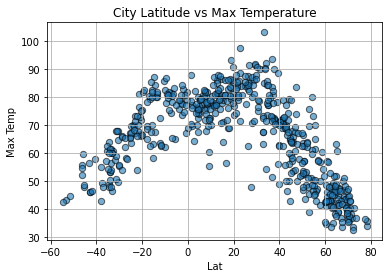

In [38]:
weather_df_clean.plot(kind = "scatter",x="Lat",y="Max Temp", alpha = .6,edgecolors='black', s= 40)
plt.grid()
plt.title("City Latitude vs Max Temperature")
plt.savefig(r"C:\Users\brand\Downloads\Bootcamp\homework-repos\python-api-challenge\Images\LatvsTemp")
plt.show()

This plot shows city latitude vs. the maximum temperature. 
This plot appears to illustrate that as you move your lattitude closer to zero the max temperature incresase as well

## Latitude vs. Humidity Plot

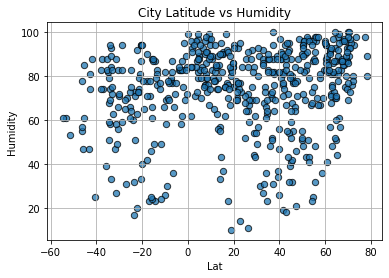

In [39]:
weather_df_clean.plot(kind = "scatter",x="Lat",y="Humidity", alpha = .75,edgecolors='black', s= 40)
plt.grid()
plt.title("City Latitude vs Humidity")
plt.savefig(r"C:\Users\brand\Downloads\Bootcamp\homework-repos\python-api-challenge\Images\LatvsHumid")
plt.show()

This plot shows city latitude vs humidity, this doesnt seem to show much of a relationship between the city latitude and the humidity. The data clusters around higher humitidy.

## Latitude vs. Cloudiness Plot

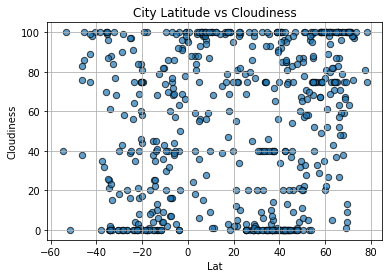

In [42]:
weather_df_clean.plot(kind = "scatter",x="Lat",y="Cloudiness", alpha = .7,edgecolors='black', s= 40)
plt.grid()
plt.title("City Latitude vs Cloudiness")
plt.savefig(r"C:\Users\brand\Downloads\Bootcamp\homework-repos\python-api-challenge\Images\LatvsCloud")
plt.show()

This plot shows city latitude vs cloudiness, This plot doesnt show much of a relationship but the data does cluster near 100% cloudiness and 0% cloudiness

## Latitude vs. Wind Speed Plot

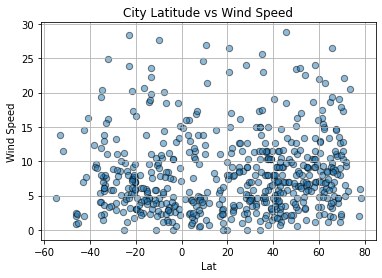

In [43]:
weather_df_clean.plot(kind = "scatter",x="Lat",y="Wind Speed", alpha = .5,edgecolors='black', s= 40)
plt.grid()
plt.title("City Latitude vs Wind Speed")
plt.savefig(r"C:\Users\brand\Downloads\Bootcamp\homework-repos\python-api-challenge\Images\LatvsSpeed")
plt.show()

This plot shows the lattitude vs the wind speed. There's not a noticible relationship, but most of the data does cluster near the 0-10 speed.

## Linear Regression

In [41]:
#split into the seperate hemispheres
weather_df_clean.head()
weather_df_north = weather_df_clean.loc[(weather_df_clean["Lat"]> 0,)] #check above 0 lattitude
weather_df_south = weather_df_clean.loc[(weather_df_clean["Lat"]< 0,)] #check below 0 lattidude
weather_df_mid = weather_df_clean.loc[(weather_df_clean["Lat"] == 0,)] #check nothing is exactly at zero
weather_df_mid #this should never exist this needs to be an empty dataframe because weather_df_mid is not a hemisphere

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

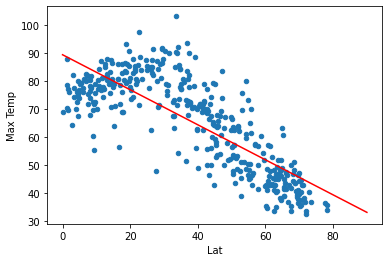

The r-value is : -0.797993369612612
y = -0.62x +89.31


In [42]:
weather_df_north.plot(kind = "scatter",x="Lat",y="Max Temp")

m,b,r,p,stdev = linregress(weather_df_north["Lat"], weather_df_north["Max Temp"])
plt.plot(np.linspace(0,90),b + m*np.linspace(0,90), color = "red")
plt.savefig(r"C:\Users\brand\Downloads\Bootcamp\homework-repos\python-api-challenge\Images\LRLatvTempN")
plt.show()
line_eq = "y = " + str(round(m,2)) + "x +" + str(round(b,2))
r =f"The r-value is : {r}"
print(r)
print(line_eq)

The model represents the relationship between the lattitude and the maximum temperature in the north hemisphere. This relationship is relativly strong at a -.71 r-value. This means as the lattitude increases the temperature decreases. 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

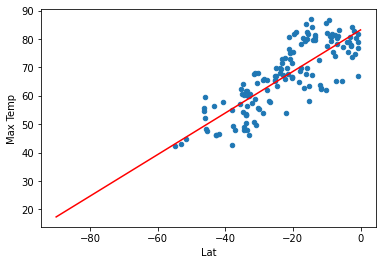

The r-value is : 0.817498667748128
y = 0.73x +83.21


In [43]:
weather_df_south.plot(kind = "scatter",x="Lat",y="Max Temp")

m,b,r,p,stdev = linregress(weather_df_south["Lat"], weather_df_south["Max Temp"])
plt.plot(np.linspace(-90,0),b + m*np.linspace(-90,0), color = "red")
plt.savefig(r"C:\Users\brand\Downloads\Bootcamp\homework-repos\python-api-challenge\Images\LRLatvTempS")
plt.show()
line_eq = "y = " + str(round(m,2)) + "x +" + str(round(b,2))
r =f"The r-value is : {r}"
print(r)
print(line_eq)

The model represents the relationship between the lattitude and the maximum temperature in the north hemisphere. This relationship is relativly strong at a .803 r-value. This means as the lattitude increases the temperature increases. Compared to the northern hemisphere the souther hemisphere has a much more clusterd dataset. This can be due to our choice of the lower bound of latitude having less data points to skew it to one side or another. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

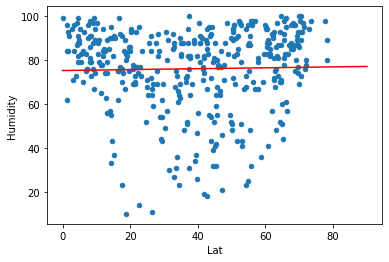

The r-value is : 0.023117081805195058
y = 0.02x +75.3


In [44]:
weather_df_north.plot(kind = "scatter",x="Lat",y="Humidity")

m,b,r,p,stdev = linregress(weather_df_north["Lat"], weather_df_north["Humidity"])
plt.plot(np.linspace(0,90),b + m*np.linspace(0,90), color = "red")
plt.savefig(r"C:\Users\brand\Downloads\Bootcamp\homework-repos\python-api-challenge\Images\LRLatvHumidN")
plt.show()
line_eq = "y = " + str(round(m,2)) + "x +" + str(round(b,2))
r =f"The r-value is : {r}"
print(r)
print(line_eq)

The model indicates the relationship between the northern hemisphere humidity and the lattitude does not have a strong linear relationship. This is also indicated by the low rvalue and lack of noticible trend in the graph

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

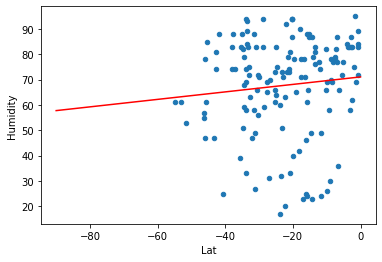

The r-value is : 0.10059240804747877
y = 0.15x +71.06


In [45]:
weather_df_south.plot(kind = "scatter",x="Lat",y="Humidity")
m,b,r,p,stdev = linregress(weather_df_south["Lat"], weather_df_south["Humidity"])
plt.plot(np.linspace(-90,0),b + m*np.linspace(-90,0), color = "red")
plt.savefig(r"C:\Users\brand\Downloads\Bootcamp\homework-repos\python-api-challenge\Images\LRLatvHumidS")
plt.show()
line_eq = "y = " + str(round(m,2)) + "x +" + str(round(b,2))
r =f"The r-value is : {r}"
print(r)
print(line_eq)

This indicates there is little relationship between humidity percentage and latitude. Again this data is affected by the larger range of latitudes we have chosen for the souther hemisphere. There no strong relationship in the linear regression or graph

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

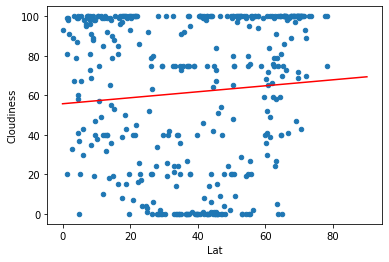

The r-value is : 0.08401975745226647
y = 0.15x +55.73


In [46]:
weather_df_north.plot(kind = "scatter",x="Lat",y="Cloudiness")

m,b,r,p,stdev = linregress(weather_df_north["Lat"], weather_df_north["Cloudiness"])
plt.plot(np.linspace(0,90),b + m*np.linspace(0,90), color = "red")
plt.savefig(r"C:\Users\brand\Downloads\Bootcamp\homework-repos\python-api-challenge\Images\LRLatvCloudN")
plt.show()
line_eq = "y = " + str(round(m,2)) + "x +" + str(round(b,2))
r =f"The r-value is : {r}"
print(r)
print(line_eq)

This linear regression shows the relationship between cloudiness and lattitude is not very strong as it has a very low rvalue. This is also indicated by the graph's lack of relationship. however, we can notice the data clumps towards values of 100% cloudiness and 0% cloudiness

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

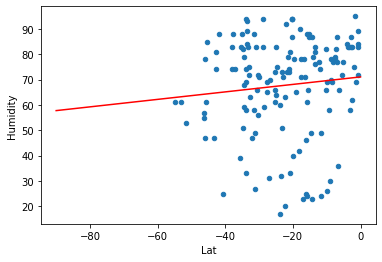

The r-value is : 0.10059240804747877
y = 0.15x +71.06


In [47]:
weather_df_south.plot(kind = "scatter",x="Lat",y="Humidity")
m,b,r,p,stdev = linregress(weather_df_south["Lat"], weather_df_south["Humidity"])
plt.plot(np.linspace(-90,0),b + m*np.linspace(-90,0), color = "red")
plt.savefig(r"C:\Users\brand\Downloads\Bootcamp\homework-repos\python-api-challenge\Images\LRLatvCloudS")
plt.show()
line_eq = "y = " + str(round(m,2)) + "x +" + str(round(b,2))
r =f"The r-value is : {r}"
print(r)
print(line_eq)

The r values and graph indicate there is not a strong relationship between cloudiness and latitude in the southern hemisphere. The data does not clump nearly as much as the northern hemisphere data does. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

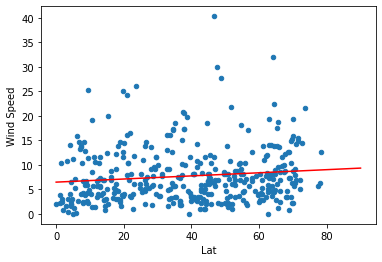

The r-value is : 0.11934785131569728
y = 0.03x +6.48


In [48]:
weather_df_north.plot(kind = "scatter",x="Lat",y="Wind Speed")

m,b,r,p,stdev = linregress(weather_df_north["Lat"], weather_df_north["Wind Speed"])
plt.plot(np.linspace(0,90),b + m*np.linspace(0,90), color = "red")
plt.savefig(r"C:\Users\brand\Downloads\Bootcamp\homework-repos\python-api-challenge\Images\LRLatvWindN")
plt.show()
line_eq = "y = " + str(round(m,2)) + "x +" + str(round(b,2))
r =f"The r-value is : {r}"
print(r)
print(line_eq)

As indicated by the graph and r-value the relationship between wind speed and latitude in the northern hemisphere is not very strong. The data mostly clumps between speeds of 0-10.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

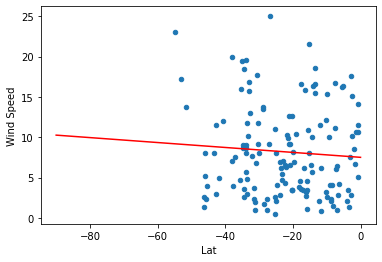

The r-value is : -0.07243486325650035
y = -0.03x +7.51


In [49]:
weather_df_south.plot(kind = "scatter",x="Lat",y="Wind Speed")
m,b,r,p,stdev = linregress(weather_df_south["Lat"], weather_df_south["Wind Speed"])
plt.plot(np.linspace(-90,0),b + m*np.linspace(-90,0), color = "red")
plt.savefig(r"C:\Users\brand\Downloads\Bootcamp\homework-repos\python-api-challenge\Images\LRLatvWindS")
plt.show()
line_eq = "y = " + str(round(m,2)) + "x +" + str(round(b,2))
r =f"The r-value is : {r}"
print(r)
print(line_eq)

The graph and linear regression indicate that there is little to no relationship between the wind speed and latitude in teh southern hemisphere.

In [53]:
pip install gmaps

  Created wheel for gmaps: filename=gmaps-0.9.0-py2.py3-none-any.whl size=2076111 sha256=a6f7676702a2d0e1d908bb2816a33048e86732f91dbca4036856bcf728c93dde
  Stored in directory: c:\users\brand\appdata\local\pip\cache\wheels\30\bd\87\d0d731ee712c34a4d6bace8b1dbf8c8932e22a1625b4a55be4
Successfully built gmaps
Note: you may need to restart the kernel to use updated packages.


In [56]:
import gmaps
import os

ModuleNotFoundError: No module named 'google.colab'

In [51]:
weather_df.to_csv("weather.csv")
weather_df2 = pd.read_csv("weather.csv")
weather_df2.head()

,Unnamed: 0,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,mataura,-46.193952,168.865478,55.80,55,100,2.55,NZ,1662940196
1,1,zhigansk,66.752064,123.394112,36.86,83,41,9.69,RU,1662940197
2,2,butaritari,3.116667,172.800000,82.06,71,89,10.74,KI,1662940197
3,3,punta arenas,-53.163384,-70.907826,43.09,61,40,17.27,CL,1662940198
4,4,rikitea,-23.122303,-134.969154,73.13,73,3,5.41,PF,1662940199


In [52]:
locations = weather_df[["Lat" , "Lng"]]
fig = gmaps.figure(map_type='HYBRID')
heatmap_layer = gmaps.heatmap_layer(locations , weights=weather_df['Humidity'],max_intensity=100,point_radius=30)
fig.add_layer(heatmap_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [53]:
vacation_df = weather_df.loc[(weather_df["Max Temp"]>70 )&(weather_df["Max Temp"]<80)&(weather_df["Wind Speed"]<10)&(weather_df["Cloudiness"] == 0)]
vacation_df = vacation_df.reset_index()
hotel_df= pd.DataFrame()
hotel_df["City"]= vacation_df["City"]
hotel_df["Lat"] = vacation_df["Lat"]
hotel_df["Lng"] = vacation_df["Lng"]
hotel_df["Country"] = vacation_df["Country"]
hotel_df["Hotel Name"] = ""
hotel_df["Rating"] = ""
vacation_df.head()

,index,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,178,fortuna,40.598187,-124.157276,71.92,79,0,8.05,US,1662940293
1,190,nador,35.168616,-2.927584,77.25,88,0,3.44,MA,1662940299
2,206,shangqiu,34.414270,115.656350,73.38,64,0,2.26,CN,1662940307
3,241,los llanos de aridane,28.657722,-17.912202,71.26,84,0,5.99,ES,1662940325
4,293,cayenne,4.922420,-52.313453,76.91,88,0,0.00,GF,1662940353


In [54]:
base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
params = {
    "location": "", 
    "rankby": "distance",
    "type": "hotel",
    "key": g_key,}
for index, row in vacation_df.iterrows():
  params["location"] = f"{row['Lat']},{row['Lng']}"
  response = requests.get(base_url, params=params).json()
  result = response["results"][0]
  print(response["results"][0].keys())
  try:
        name = response["results"][0]["name"]
        print(f"Closest hotel is {name}.")
        
        hotel_df.loc[index, 'Hotel Name'] = result['name']
        hotel_df.loc[index, 'address'] = result['vicinity']
        hotel_df.loc[index, 'rating'] = result['rating']
        
  except (KeyError, IndexError):
        print("Missing field/result... skipping.")
  print("------------")


dict_keys(['business_status', 'geometry', 'icon', 'icon_background_color', 'icon_mask_base_uri', 'name', 'place_id', 'plus_code', 'reference', 'scope', 'types', 'vicinity'])
Closest hotel is sam Glass trucking.
Missing field/result... skipping.
------------
dict_keys(['business_status', 'geometry', 'icon', 'icon_background_color', 'icon_mask_base_uri', 'name', 'opening_hours', 'place_id', 'plus_code', 'reference', 'scope', 'types', 'vicinity'])
Closest hotel is BioCoin Restaurant.
Missing field/result... skipping.
------------
dict_keys(['business_status', 'geometry', 'icon', 'icon_background_color', 'icon_mask_base_uri', 'name', 'place_id', 'reference', 'scope', 'types', 'vicinity'])
Closest hotel is 商丘市纪检委.
Missing field/result... skipping.
------------
dict_keys(['business_status', 'geometry', 'icon', 'icon_background_color', 'icon_mask_base_uri', 'name', 'opening_hours', 'photos', 'place_id', 'plus_code', 'rating', 'reference', 'scope', 'types', 'user_ratings_total', 'vicinity'])
C

In [55]:
hotel_df
# NOTE: Do not change any of the code in this cell 
#i changed code in this cell

# Using the template add the hotel marks to the heatmap
info_box_template = """
<dl>
<dt>Name</dt><dd>{Hotel Name}</dd>
<dt>City</dt><dd>{City}</dd>
<dt>Country</dt><dd>{Country}</dd>
</dl>
"""
# Store the DataFrame Row
# NOTE: be sure to update with your DataFrame name
hotel_info = [info_box_template.format(**row) for index, row in hotel_df.iterrows()]
locations = hotel_df[["Lat", "Lng"]]
marker_layer = gmaps.marker_layer(locations, info_box_content=hotel_info)
fig = gmaps.figure()
fig.add_layer(marker_layer)
fig

Figure(layout=FigureLayout(height='420px'))